In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv('champlist.csv')
df.head()

,id,champ,dmg,dmgspd,hp,mana,hregen,mregen,def,mdef,spd,rng
0,champ19,가렌,69.0,0.625,690.0,0.0,8.00,0.00,38.0,32.1,340,175
1,champ17,갈리오,59.0,0.625,632.0,500.0,8.71,9.50,24.0,32.1,335,125
2,champ18,갱플랭크,64.0,0.690,600.0,282.2,5.51,7.68,31.0,32.1,345,125
3,champ20,그라가스,64.0,0.625,670.0,400.0,8.68,6.00,38.0,32.1,330,125
4,champ85,그레이브즈,68.0,0.625,625.0,325.0,6.68,8.00,33.0,32.0,345,425


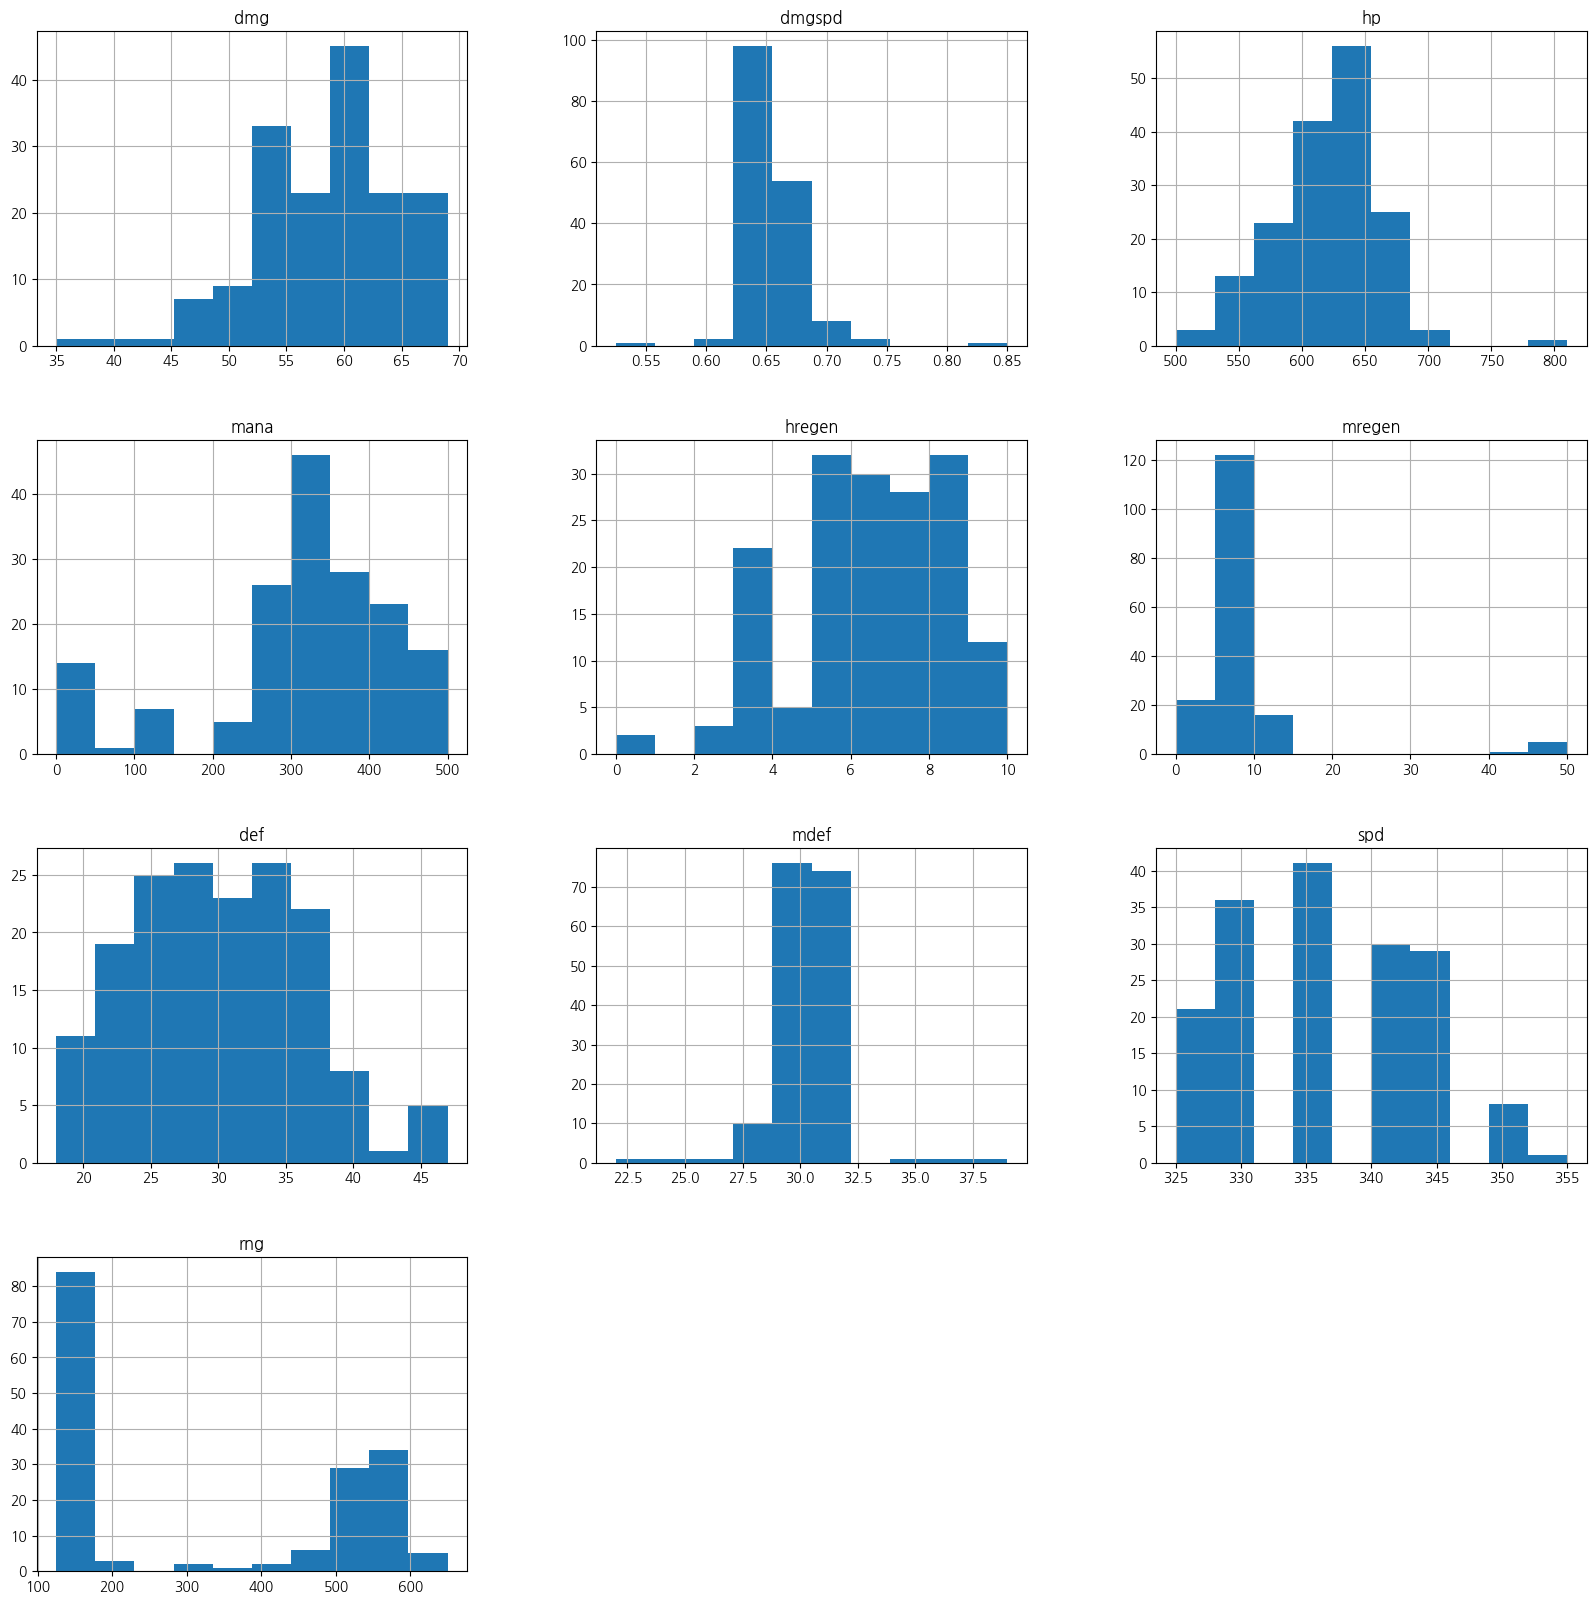

In [22]:
#i want to see distribution of each column
df.hist(figsize=(20,20))
plt.show()

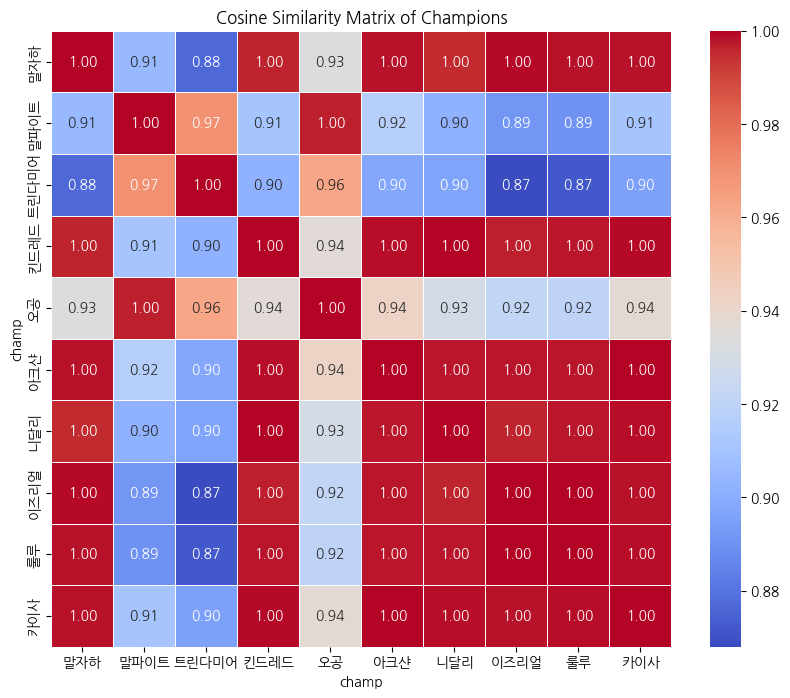

In [27]:

from sklearn.metrics.pairwise import cosine_similarity
#shuffle the data row
data = df.sample(frac=1).reset_index(drop=True)
# reduce the number of rows to 10 for faster computation
data = data.head(10)

# Extract numerical attributes for similarity calculation
attributes = data.drop(['id', 'champ'], axis=1)

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(attributes)

# Convert the similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=data['champ'], columns=data['champ'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(cosine_sim_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Cosine Similarity Matrix of Champions")
plt.show()
